# Importing required libraries

In [ ]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('seaborn-poster')
style.use('ggplot')
import seaborn as sns
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import requests

# For getting the data
1. Downloding the data from the link and saving it
2. Converting the file into CSV file
3. Loading the csv file in pandas dataframe object

In [ ]:
# Downloading the csv file(The Kaggle one) from a link to use it
file_url = "https://drive.google.com/uc?export=download&id=1rUxETGW4GJtXCtGgsIcQdchGLafkmq8H"
req = requests.get(file_url)
csv_file = open('customer_dataset.csv', 'wb')
csv_file.write(req.content)
csv_file.close()

In [ ]:
df = pd.read_csv("./customer_dataset.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Checking for Missing and Null Values
> `Observation`:
+ There is no null or missing values in the dataset
+ Appearantly there are no outliers
+ Values in corresponding columns are of integer or float type
+ This shows that our data is well formated and cleaned

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


None

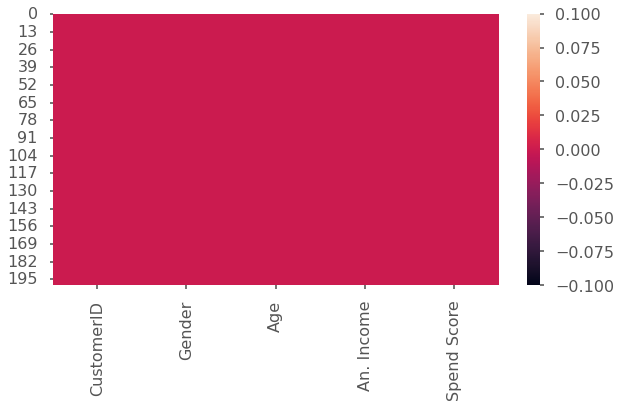

In [ ]:
display(df.describe())
display(df.info())
df = df.rename(columns={
    "Annual Income (k$)": "An. Income",
    "Spending Score (1-100)": "Spend Score"
})
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(ax=ax, data=df.isnull())

# Observing distributions of different features of the dataset
> `Observations:`
+ From the distribution curve of the age of customers, it prominent that there is a majority of young population that visits the mall more frequently than others.
+ Spending score also signifies that, there is less number of customers who spend a lot.
+ The KDE curve of annual income clearly shows that the number of people having much higher annual income is significantly less.
+ The gender percentage clearly shows that women are more into visiting mall than men. Although it can also due to the fact that the data is insufficient.


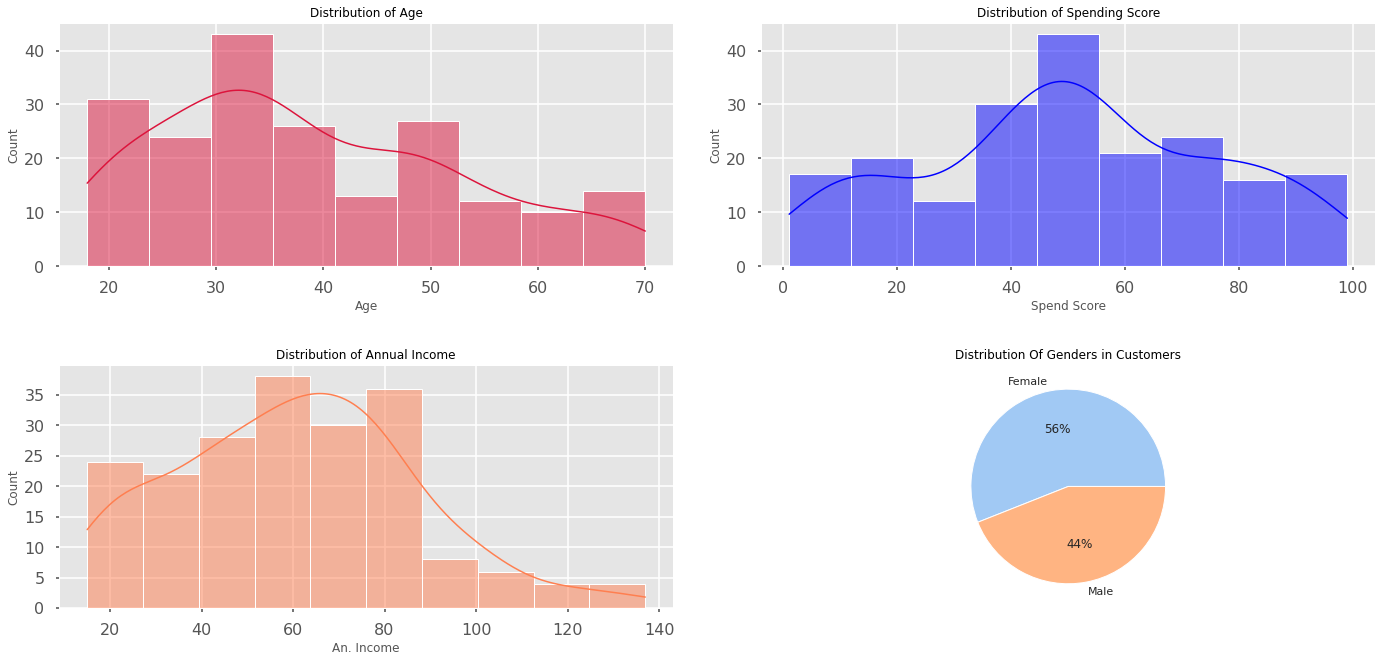

In [ ]:
# Distribution of Income, Spending score, Gender, Age
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
sns.set(style='darkgrid')

sns.histplot(df['Age'], ax=axes[0][0], kde=True, color='crimson')
axes[0][0].set_title('Distribution of Age')
sns.histplot(df['Spend Score'], ax=axes[0][1], kde=True, color='blue')
axes[0][1].set_title('Distribution of Spending Score')
sns.histplot(df['An. Income'], ax=axes[1][0], kde=True, color='coral')
axes[1][0].set_title('Distribution of Annual Income')

colors = sns.color_palette('pastel')[0:5]
axes[1][1].pie(df['Gender'].value_counts(), colors = colors, labels=['Female', 'Male'], autopct='%.0f%%')
axes[1][1].set_title('Distribution Of Genders in Customers')
fig.tight_layout(pad=3.0)
plt.savefig("./dist_age_sc_an.png", bbox_inches="tight")

# Preprocessing data
+ One-hot-encoding of classes
+ Normalization

In [ ]:
# Preprocessing the data
one_hot = pd.get_dummies(df['Gender'])
df_encoded = df.join(one_hot)
df_encoded.drop('Gender', axis=1, inplace=True)
df_encoded.head()

,CustomerID,Age,An. Income,Spend Score,Female,Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


In [ ]:
print(len(df.columns))

5


# Correlation
Plotting the heatmap which shows how much each parameter is correlated to each other. Such representation is a key factor to understand the pattern which governs a customers willingness to spend more.
>`Observations:`
+ This Heat map reflects the most correlated features with Orange Color and least correlated features with red color.
+ It can be seen that these attributes do not have good correlation among them, that's why we will proceed with all of the features.




1.0


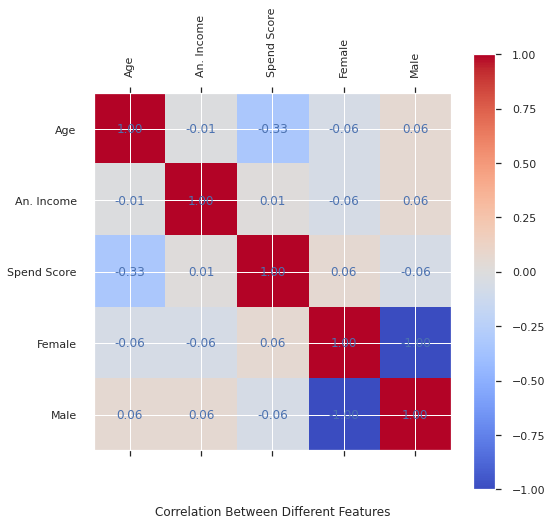

In [ ]:
# Correlation
df_new = df_encoded.drop(['CustomerID'], axis=1)
corr = df_new.corr()
print(corr['Age']['Age'])

columns = df_new.columns
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
c_ax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(c_ax)
ticks = np.arange(0,len(columns),1)
ax.set_xticks(ticks)
plt.title('Correlation Between Different Features', y=-0.2)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(columns)
ax.set_yticklabels(columns)

columns
for i in range(len(columns)):
    for j in range(len(columns)):
        text = ax.text(j, i, 
                       "{:.2f}".format(corr[columns[i]][columns[j]]),
                       ha="center", va="center", color="b")

plt.savefig("./corr.png", bbox_inches="tight")
plt.show()


#Observing range of spending score and age of different genders
> `Observations:`
+ It can be seen that the median of spending score of male and female are just above 50.
+ One key point to be observed that females have higer upper range in spending score. It shows women are can spend more in a mall and can be useful for the mall administratives to take better decision.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


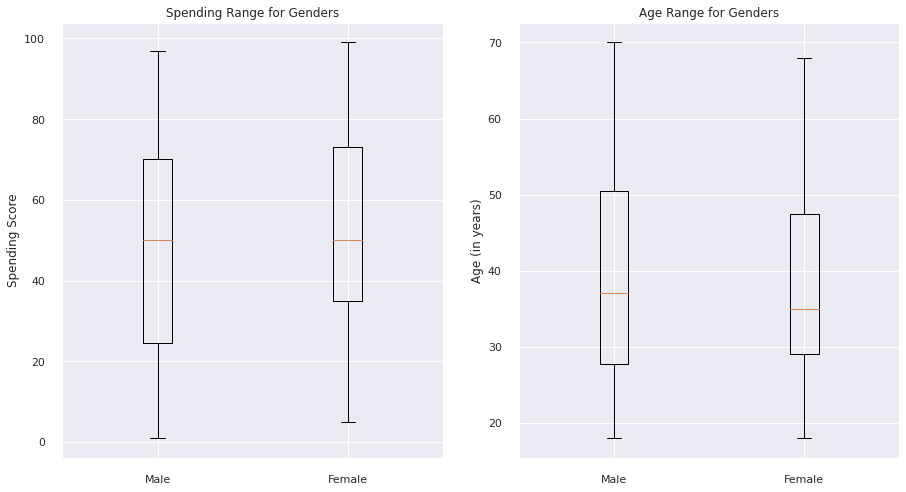

In [ ]:
male_spending = df_encoded[df_encoded['Male'] == 1]['Spend Score']
female_spending = df_encoded[df_encoded['Female'] == 1]['Spend Score']
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
spend_columns = [male_spending, female_spending]

ax[0].boxplot(spend_columns)
ax[0].set_xticklabels(["Male", "Female"])
ax[0].set_title('Spending Range for Genders')
ax[0].set_ylabel("Spending Score")

male_age = df_encoded[df_encoded['Male'] == 1]['Age']
female_age = df_encoded[df_encoded['Female'] == 1]['Age']
age_columns = [male_age, female_age]
ax[1].boxplot(age_columns)
ax[1].set_xticklabels(["Male", "Female"])
ax[1].set_title('Age Range for Genders')
ax[1].set_ylabel("Age (in years)")
plt.savefig("./box_plots.png", bbox_inches="tight")

plt.show()

# medians = [round(item.get_ydata()[0], 1) for item in bp['medians']]

# Observing the variation of Spending score with age
>`Observations:`
+ It can be observed that in case of both genders, spending score is slightly has negative correlation with age.
+ It indicates that young people tend to spend more than people with higher age.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


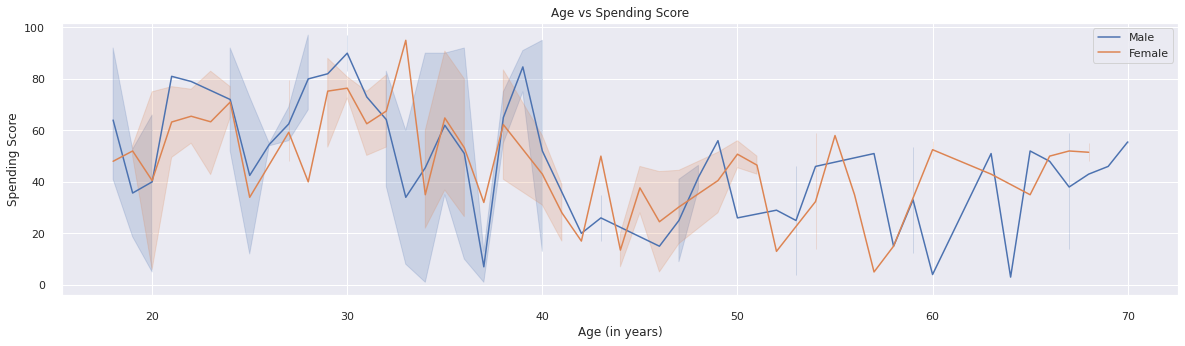

In [ ]:
fig = plt.figure(figsize=(20, 5))

spending_age_male = df_encoded[df_encoded['Male'] == 1].loc[:, ['Age', 'Spend Score']]
spending_age_male = spending_age_male.sort_values('Age')
sns.lineplot(spending_age_male['Age'], spending_age_male['Spend Score'], label='Male')

spending_age_female = df_encoded[df_encoded['Female'] == 1].loc[:, ['Age', 'Spend Score']]
spending_age_female = spending_age_female.sort_values('Age')
sns.lineplot(spending_age_female['Age'], spending_age_female['Spend Score'], label='Female')

plt.xlabel("Age (in years)")
plt.ylabel("Spending Score")
plt.title("Age vs Spending Score")
plt.legend()
plt.savefig("./spend_sc_vs_age.png", bbox_inches="tight")
plt.show()


# Observing the variation of annual income with age
>`Observations:`
+ Although the curve does not quite give much insights about the variation of annual income and age, we can see that most of the high annual income persons are between the age of 30 and 50 years.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


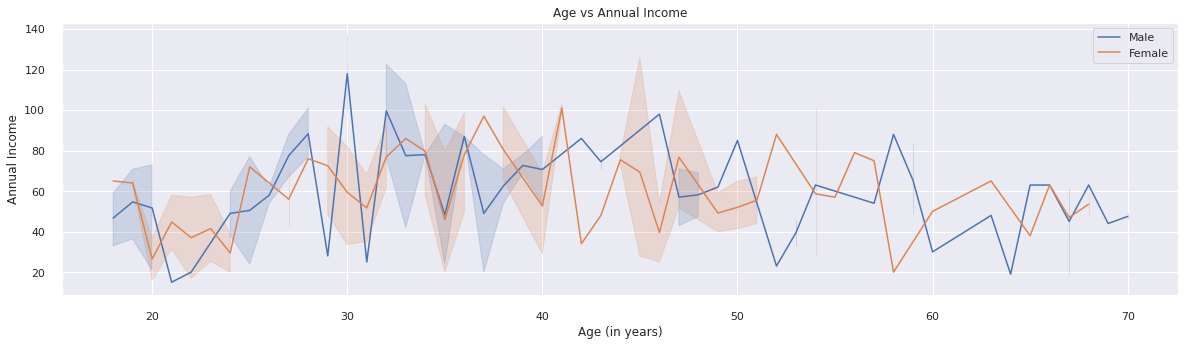

In [ ]:
fig = plt.figure(figsize=(20, 5))

spending_age_male = df_encoded[df_encoded['Male'] == 1].loc[:, ['Age', 'An. Income']]
spending_age_male = spending_age_male.sort_values('Age')
sns.lineplot(spending_age_male['Age'], spending_age_male['An. Income'], label='Male')

spending_age_female = df_encoded[df_encoded['Female'] == 1].loc[:, ['Age', 'An. Income']]
spending_age_female = spending_age_female.sort_values('Age')
sns.lineplot(spending_age_female['Age'], spending_age_female['An. Income'], label='Female')

plt.xlabel("Age (in years)")
plt.ylabel("Annual Income")
plt.title("Age vs Annual Income")
plt.legend()
plt.savefig("./an_vs_age.png", bbox_inches="tight")
plt.show()


# Variation of Annual Income and Spending Score
>`Observations:`:
+ Logically it can be assumed that annual income and spending abillity of a person is positively correlated. But the data does not signify this assumption. So further segmentation of the customers is required.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


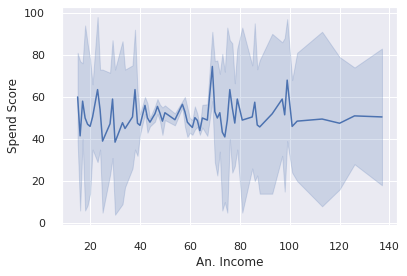

In [ ]:
income_spend = df.loc[:, ["An. Income", "Spend Score"]].sort_values("An. Income")
sns.lineplot(income_spend["An. Income"], income_spend["Spend Score"])

# Pair Plotting the parameters
>`Observations:`
+ By plotting the pair of parameters we can observe the different variations.

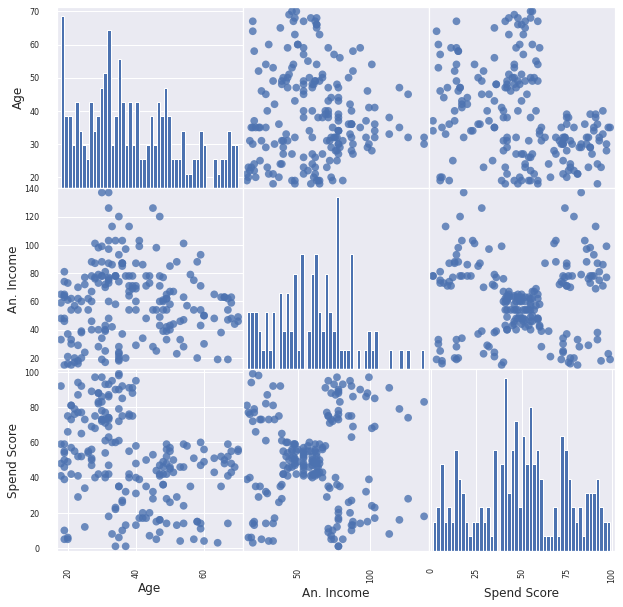

In [ ]:
pax = pd.plotting.scatter_matrix(df.drop("CustomerID", axis=1), figsize=(10,10), marker = 'o', hist_kwds = {'bins': 50}, s = 60, alpha = 0.8)
plt.show()

# Using K-Means Clustering
To find different clusters of customers in the dataset 'K-Means' is used. Using the parameters 'Age', 'Spend Score' and 'Annual Income'. The gender is not considered because it does to matter from a buisness perspective of finding clusters. For finding the optimal number of clusters the 'Elbow Method' is used.
>`Observations:`
+ By observing the elbow method, the optimal number of customers that is found is `5`.

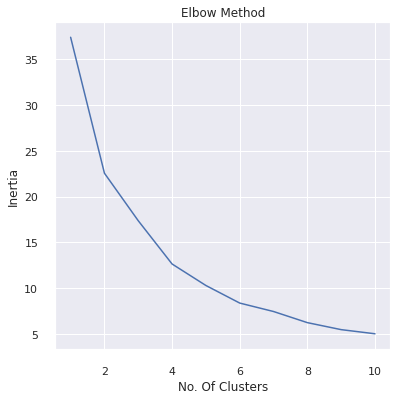

In [ ]:
X=df_encoded.drop(["CustomerID", "Male", "Female"], axis=1)
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)
inertia = []
for i in range(1,11):
    kmeans = KMeans(
        n_clusters=i, init="k-means++",
        max_iter=300,
        n_init=10,
        tol=1e-04, random_state=42
    )
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6, 6))
plt.plot(range(1,11), inertia)
plt.title("Elbow Method")
plt.xlabel("No. Of Clusters")
plt.ylabel("Inertia")
plt.savefig("three_params_elbow.png", bbox_inches="tight")
plt.show()

# Counting the number of customers in each clusters

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


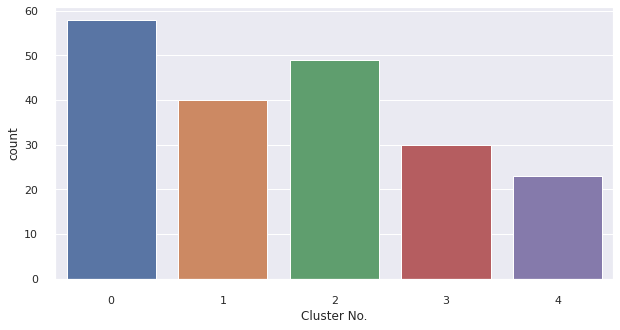

In [ ]:
model = KMeans(n_clusters = 5, init = "k-means++", max_iter = 300, n_init = 10, random_state = 42)
y_clusters = model.fit_predict(X)

fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(y_clusters, ax=ax)
ax.set_xlabel("Cluster No.")
plt.savefig("./three_params_cluster_count.png", bbox_inches="tight")

# Plotting the clusters of customers along with centeroids
>`Observations`:
+ The positions of the customers on the 3D plot gives insights to the nature of visiting customers.
+ Customers from Cluster 1 are the ones who are most important for the buisness.
+ The customers form Cluster 0 are of regular type customers.

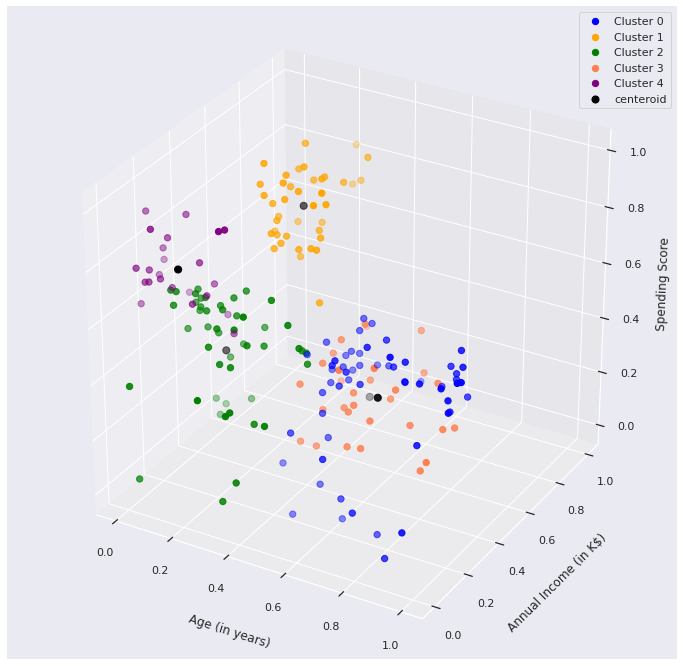

In [ ]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[y_clusters == 0,0],X[y_clusters == 0,1],X[y_clusters == 0,2], s = 40 , color = 'blue', label = "Cluster 0")
ax.scatter(X[y_clusters == 1,0],X[y_clusters == 1,1],X[y_clusters == 1,2], s = 40 , color = 'orange', label = "Cluster 1")
ax.scatter(X[y_clusters == 2,0],X[y_clusters == 2,1],X[y_clusters == 2,2], s = 40 , color = 'green', label = "Cluster 2")
ax.scatter(X[y_clusters == 3,0],X[y_clusters == 3,1],X[y_clusters == 3,2], s = 40 , color = 'coral', label = "Cluster 3")
ax.scatter(X[y_clusters == 4,0],X[y_clusters == 4,1],X[y_clusters == 4,2], s = 40 , color = 'purple', label = "Cluster 4")
ax.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:, 1], model.cluster_centers_[:, 2], s = 50, c = 'black' , label = 'centeroid')
ax.set_xlabel('Age (in years)', labelpad=25)
ax.set_ylabel('Annual Income (in K$)', labelpad=25)
ax.set_zlabel('Spending Score', labelpad=20)
ax.legend()
plt.savefig("3d_plot.png", bbox_inches="tight")
plt.show()


# Clustering based on Spending Score and Annual Income

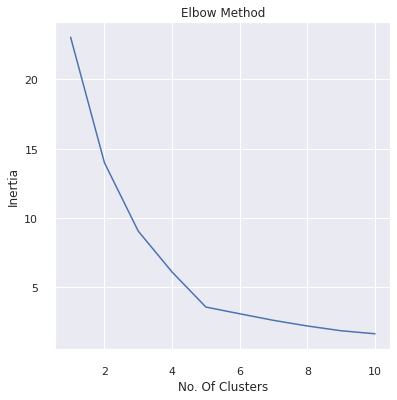

In [ ]:
X2=df_encoded.drop(["CustomerID", "Male", "Female", "Age"], axis=1)
scaler = MinMaxScaler()
scaler.fit(X2)
X2=scaler.transform(X2)
inertia2 = []
for i in range(1,11):
    kmeans = KMeans(
        n_clusters=i, init="k-means++",
        max_iter=200,
        n_init=10,
        tol=1e-04, random_state=42
    )
    kmeans.fit(X2)
    inertia2.append(kmeans.inertia_)

plt.figure(figsize=(6, 6))
plt.plot(range(1,11), inertia2)
plt.title("Elbow Method")
plt.xlabel("No. Of Clusters")
plt.ylabel("Inertia")
plt.show()

>`Observations:`
+ Clustering Analysis of Spending Score and Annual Income gives us a significant insight about the different segments of the visiting customers in the Mall. 
+ There are broadly five segments of Customers namely Miser, General, Important, Spendthrift, Careful based on their Annual Income and Spending Score which can be really useful to plan specific ways to attract different kinds of customers to specific products.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


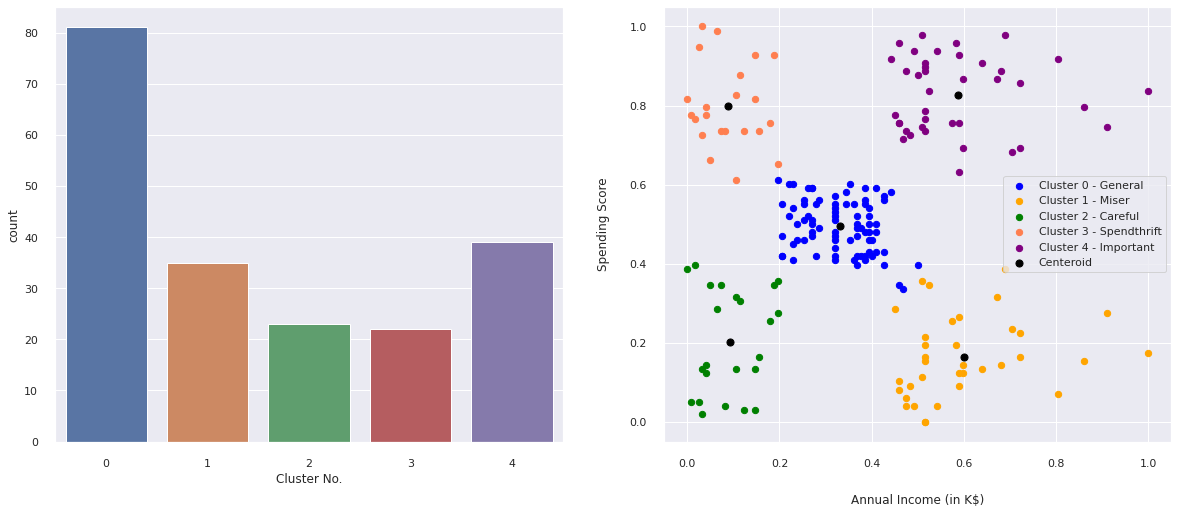

In [ ]:
model2 = KMeans(n_clusters = 5, init = "k-means++", max_iter = 300, n_init = 10, random_state = 42)
y_clusters2 = model2.fit_predict(X2)

fig, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.countplot(y_clusters2, ax=ax[0])
ax[0].set_xlabel("Cluster No.") 

X2 = np.array(X2)
# ax = fig.add_subplot(111, projection='3d')
ax[1].scatter(X2[y_clusters2 == 0,0], X2[y_clusters2 == 0,1], s = 40 , color = 'blue', label = "Cluster 0 - General")
ax[1].scatter(X2[y_clusters2 == 1,0], X2[y_clusters2 == 1,1], s = 40 , color = 'orange', label = "Cluster 1 - Miser")
ax[1].scatter(X2[y_clusters2 == 2,0], X2[y_clusters2 == 2,1], s = 40 , color = 'green', label = "Cluster 2 - Careful")
ax[1].scatter(X2[y_clusters2 == 3,0], X2[y_clusters2 == 3,1], s = 40 , color = 'coral', label = "Cluster 3 - Spendthrift")
ax[1].scatter(X2[y_clusters2 == 4,0], X2[y_clusters2 == 4,1], s = 40 , color = 'purple', label = "Cluster 4 - Important")
ax[1].scatter(model2.cluster_centers_[:,0], model2.cluster_centers_[:, 1], s = 50, c = 'black' , label = 'Centeroid')
ax[1].set_xlabel('Annual Income (in K$)', labelpad=25)
ax[1].set_ylabel('Spending Score', labelpad=20)
ax[1].legend()
plt.savefig("./two_params_count_plot.png", bbox_inches="tight")
plt.show()
